In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd

In [2]:

df1=pd.read_csv('data-0LXvV.csv')
df2=pd.read_csv('data-8zYeT.csv')
df3=pd.read_csv('data-3ozx5.csv')

/var/folders/2c/v590x63x5b70v4yczwyl8yf00000gn/T/ipykernel_16529/2909314092.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['gap']=df_x['average']-df_x['Doctor visit']
/var/folders/2c/v590x63x5b70v4yczwyl8yf00000gn/T/ipykernel_16529/2909314092.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_x['gap']=df_x['average']-df_x['Hospital emergency department visit']
/var/folders/2c/v590x63x5b70v4yczwyl8yf00000gn/T/ipykernel_16529/2909314092.py:29: SettingWithCopyWarning: 
A value is trying to be se

0.9740871613663132
0.8581235697940504
0.9108811150224568


FileNotFoundError: [Errno 2] No such file or directory: '/Users/lucinezhong/Documents/LuZHONGResearch/20220601health_disruption/resemble_plot/compare_patient_visits.png'

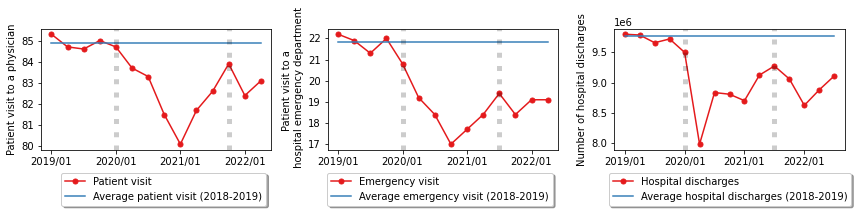

In [3]:
fig, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(12, 3))

v=np.mean(df1['Doctor visit'][0:4])
df1['average']=[v]*len(df1)

df_x=df1[df1.index>=4]
df_x['gap']=df_x['average']-df_x['Doctor visit']
print(1-df_x['gap'].sum()/(df_x['average'].sum()))

ax1.plot(df1['Quarter'],df1['Doctor visit'],marker='o',markersize=5,color='#e41a1c',label='Patient visit')
ax1.set_ylabel('Patient visit to a physician')
ax1.plot(df1['Quarter'],df1['average'],linestyle='-',color='#377eb8',label='Average patient visit (2018-2019)')

ax1.set_xticks([0,4,8,12], ['2019/01','2020/01','2021/01','2022/01'])

ax1.axvline(x=4,linestyle=':',linewidth=5,color='black',alpha=0.2)

ax1.axvline(x=11,linestyle=':',linewidth=5,color='black',alpha=0.2)

ax1.legend(bbox_to_anchor=(1, -0.15),
          fancybox=True, shadow=True, ncol=1)

v=np.mean(df3['Hospital emergency department visit'][0:4])
df3['average']=[v]*len(df3)
df1['average']=[v]*len(df1)

df_x=df3[df3.index>=4]
df_x['gap']=df_x['average']-df_x['Hospital emergency department visit']
df_x['gap']=df_x['gap']/df_x['average']
print(1-df_x['gap'].mean())
      
ax2.plot(df3['Quarter'],df3['Hospital emergency department visit'],marker='o',markersize=5,color='#e41a1c',label='Emergency visit')
ax2.plot(df3['Quarter'],df3['average'],linestyle='-',color='#377eb8',label='Average emergency visit (2018-2019)')
ax2.set_ylabel('Patient visit to a \n hospital emergency department')

ax2.set_xticks([0,4,8,12], ['2019/01','2020/01','2021/01','2022/01'])

ax2.axvline(x=4,linestyle=':',linewidth=5,color='black',alpha=0.2)

ax2.axvline(x=10,linestyle=':',linewidth=5,color='black',alpha=0.2)
ax2.legend(bbox_to_anchor=(1, -0.15),
          fancybox=True, shadow=True, ncol=1)

df_x=df2[df2.index>=4]
df_x['gap']=df_x['2018-2019 average']-df_x['Total discharges']
print(1-df_x['gap'].sum()/(df_x['2018-2019 average'].sum()))
     

ax3.plot(df2['Period'],df2['Total discharges'],marker='o',markersize=5,color='#e41a1c',label='Hospital discharges')
ax3.plot(df2['Period'],df2['2018-2019 average'],linestyle='-',color='#377eb8',label='Average hospital discharges (2018-2019)')
ax3.set_ylabel('Number of hospital discharges')

ax3.set_xticks([0,4,8,12], ['2019/01','2020/01','2021/01','2022/01'])

ax3.axvline(x=4,linestyle=':',linewidth=5,color='black',alpha=0.2)

ax3.axvline(x=10,linestyle=':',linewidth=5,color='black',alpha=0.2)
ax3.legend(bbox_to_anchor=(1.05, -0.15),
          fancybox=True, shadow=True, ncol=1)

plt.tight_layout()
fig.savefig('compare_patient_visits.png',dpi=600)